## Import Packages

In [5]:
pip install pandas


[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: pip3.12 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install matplotlib


[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: pip3.12 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [22]:
pip install seaborn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 8.0 MB/s eta 0:00:00

[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: pip3.12 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [98]:
pip install scipy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.9/24.9 MB 38.2 MB/s eta 0:00:0000:0100:01

[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: pip3.12 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [225]:
pip install jinja2

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.6/134.6 kB 5.7 MB/s eta 0:00:00

[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: pip3.12 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [16]:
pip install statsmodels

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 4.3 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.9/232.9 kB 13.5 MB/s eta 0:00:00

[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: pip3.12 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as datetime
import scipy.stats as stats
from scipy.stats import skew, kurtosis
import statsmodels.api as sm
from matplotlib.dates import DateFormatter
import statsmodels.stats.diagnostic as diag
from statsmodels.tsa.stattools import grangercausalitytests
from statsmodels.stats.diagnostic import breaks_cusumolsresid
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller
from functools import reduce

## Nvidia: The Market Disruptor
Nvidia has revolutionized AI and disrupted the stock market by dominating the GPU industry, which powers large-scale AI models like ChatGPT. Its AI chips, particularly the H100 and A100, have become essential for tech giants like Microsoft, Google, and Meta, driving massive revenue growth and making it a key force behind the NASDAQ rally. Nvidia’s stock surged over 200% in 2023, surpassing a $2 trillion market cap, as AI spending skyrocketed. Despite competition from AMD, Intel, and custom AI chips from big tech, Nvidia maintains a stronghold due to its CUDA software ecosystem and continuous hardware innovation. Its influence on AI and financial markets remains unmatched, making it one of the most significant tech companies today.

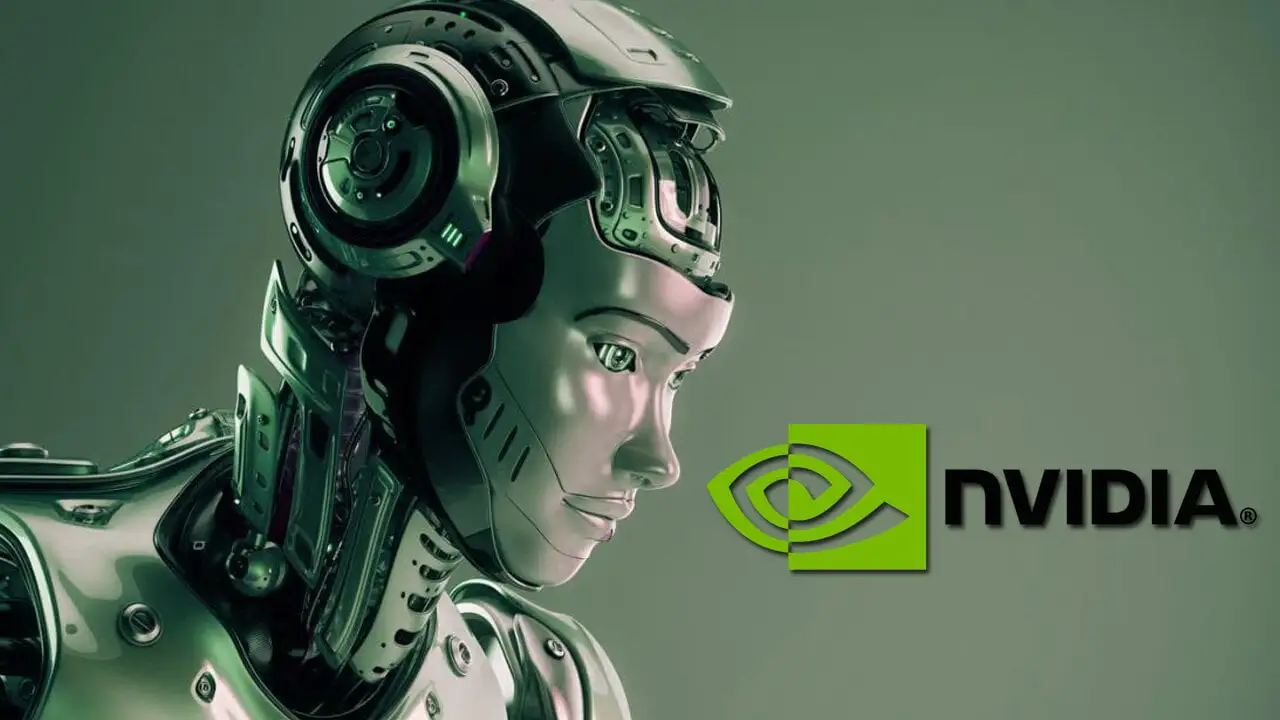

## NASDAQ's Industrial Composition
Nvidia is weighted at 4.56% second to Apple with a market capitalisation of $36,59,54,07,00,000. The stock has surged about 182% last year therefore improving its weight by 8.4%.
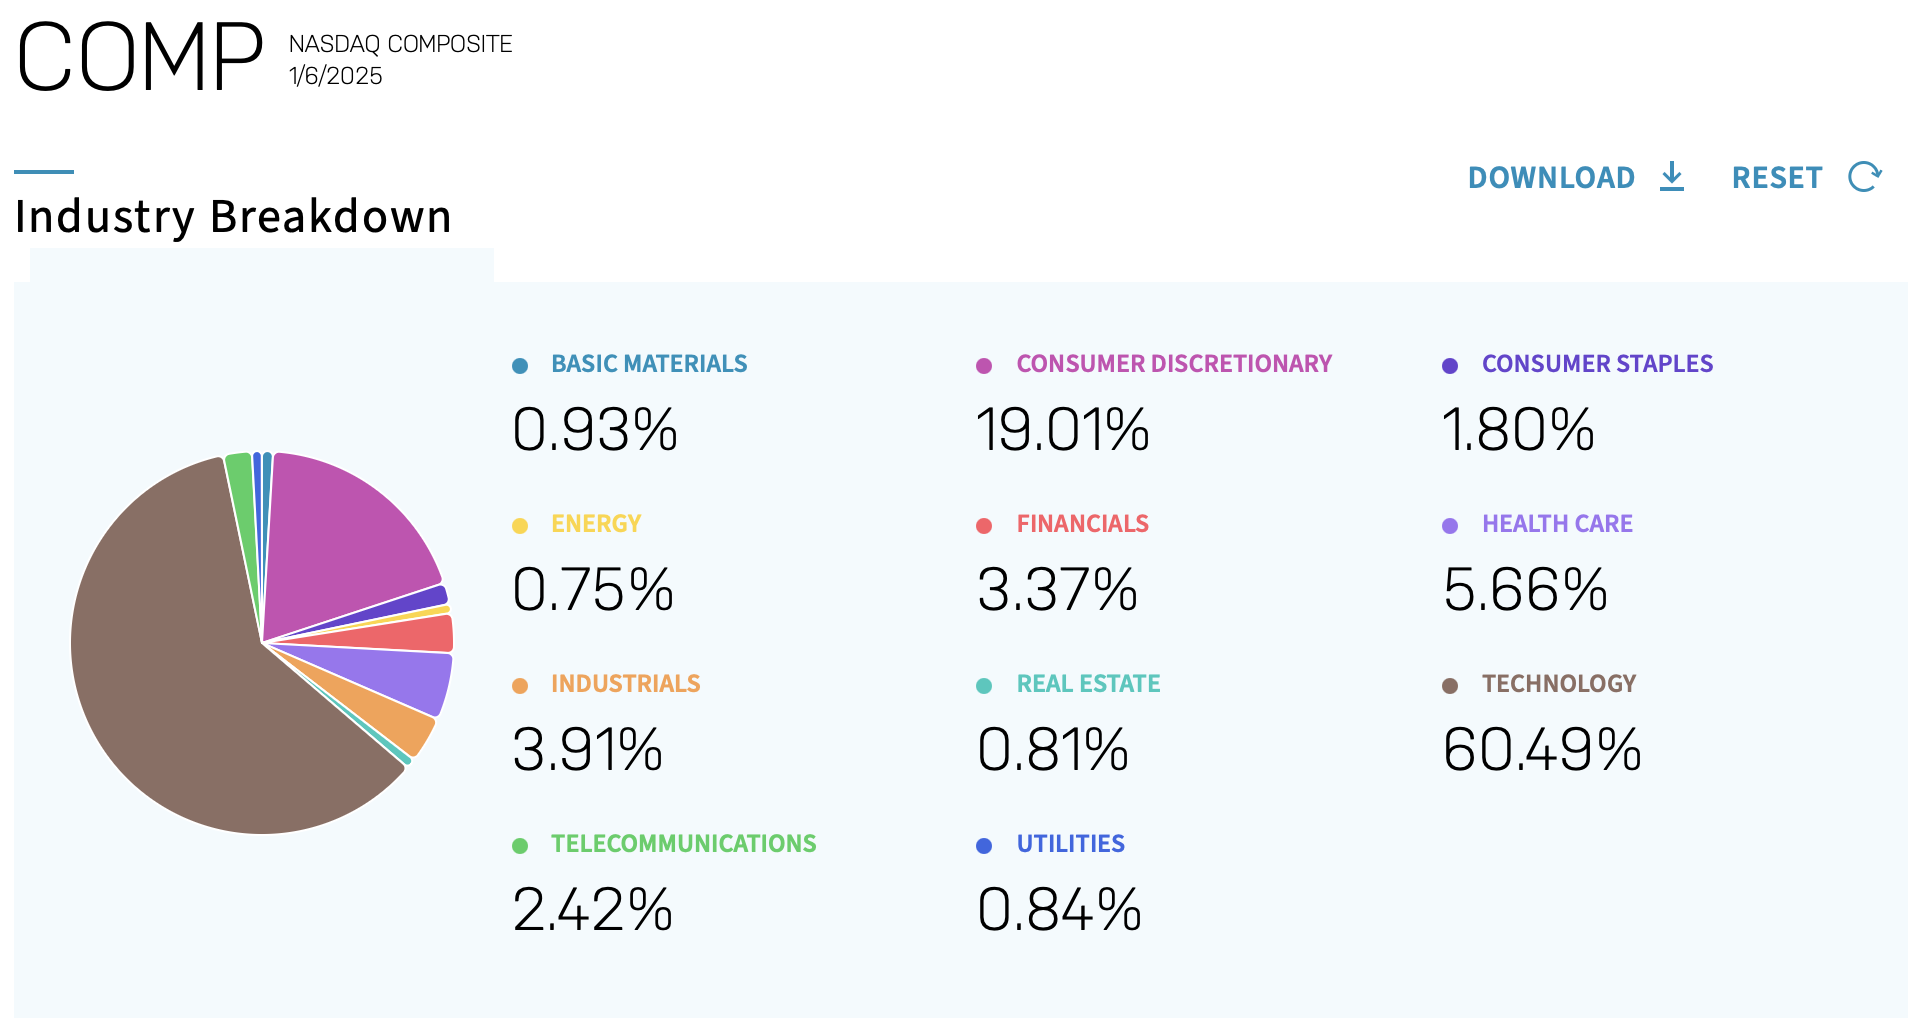

## NVDA Data Exploration
Data exploration is the process of analyzing and investigating a dataset to understand its structure, characteristics, and patterns. The following exploration is conducted for Nvidia.

### Data Manipulation
This section includes the process of cleansing and structuring of Nvidia stock price data for actionable insights.

In [90]:
nvdf = pd.read_csv('/Users/ranjithramachandran/Downloads/NVDA/histdataNVDA_1y.csv')

In [91]:
nvdf.head(5)

,Date,Close/Last,Volume,Open,High,Low
0,01/03/2025,$144.47,229322500,$140.01,$144.90,$139.73
1,01/02/2025,$138.31,198247200,$136.00,$138.88,$134.63
2,12/31/2024,$134.29,155659200,$138.03,$138.07,$133.83
3,12/30/2024,$137.49,167734700,$134.83,$140.27,$134.02
4,12/27/2024,$137.01,170582600,$138.55,$139.02,$134.71


In [92]:
nvdf.tail(5)

,Date,Close/Last,Volume,Open,High,Low
247,01/10/2024,$54.35,533795800,$53.616,$54.60,$53.489
248,01/09/2024,$53.14,773100100,$52.401,$54.325,$51.69
249,01/08/2024,$52.253,642509900,$49.512,$52.275,$49.479
250,01/05/2024,$49.097,415039300,$48.462,$49.547,$48.306
251,01/04/2024,$47.998,306534900,$47.767,$48.50,$47.508


#### Date Time Conversion
Date column requires a conversion to the date time format.

In [93]:
nvdf['Date'] = pd.to_datetime(nvdf['Date']) #Convert to datetime using 'pd.to_datetime'
# nvdf['Date'] = nvdf["Date"].dt.strftime('%Y-%m-%d %H:%M:%S') can be used to covert datetime format

In [94]:
nvdf

,Date,Close/Last,Volume,Open,High,Low
0,2025-01-03,$144.47,229322500,$140.01,$144.90,$139.73
1,2025-01-02,$138.31,198247200,$136.00,$138.88,$134.63
2,2024-12-31,$134.29,155659200,$138.03,$138.07,$133.83
3,2024-12-30,$137.49,167734700,$134.83,$140.27,$134.02
4,2024-12-27,$137.01,170582600,$138.55,$139.02,$134.71
...,...,...,...,...,...,...
247,2024-01-10,$54.35,533795800,$53.616,$54.60,$53.489
248,2024-01-09,$53.14,773100100,$52.401,$54.325,$51.69
249,2024-01-08,$52.253,642509900,$49.512,$52.275,$49.479
250,2024-01-05,$49.097,415039300,$48.462,$49.547,$48.306


#### Data Type Conversion
To identify data types and convert them to the required format for exploration.

In [95]:
print(nvdf.dtypes)

Date          datetime64[ns]
Close/Last            object
Volume                 int64
Open                  object
High                  object
Low                   object
dtype: object


In [99]:
nvdf['Close/Last'] = nvdf['Close/Last'].replace({'$': '', ',': ''}, regex=True).astype(float)
nvdf['Open'] = nvdf['Open'].replace({'$': '', ',': ''}, regex=True).astype(float)
nvdf['High'] = nvdf['High'].replace({'$': '', ',': ''}, regex=True).astype(float)
nvdf['Low'] = nvdf['Low'].replace({'$': '', ',': ''}, regex=True).astype(float)

In [100]:
print(nvdf.dtypes)

Date          datetime64[ns]
Close/Last           float64
Volume                 int64
Open                 float64
High                 float64
Low                  float64
dtype: object


#### Missing Values
To identify missing values in the dataframe.

In [101]:
nvdf.isna().sum()

Date          0
Close/Last    0
Volume        0
Open          0
High          0
Low           0
dtype: int64

In [102]:
nvdf.round(2)

,Date,Close/Last,Volume,Open,High,Low
0,2025-01-03,144.47,229322500,140.01,144.90,139.73
1,2025-01-02,138.31,198247200,136.00,138.88,134.63
2,2024-12-31,134.29,155659200,138.03,138.07,133.83
3,2024-12-30,137.49,167734700,134.83,140.27,134.02
4,2024-12-27,137.01,170582600,138.55,139.02,134.71
...,...,...,...,...,...,...
247,2024-01-10,54.35,533795800,53.62,54.60,53.49
248,2024-01-09,53.14,773100100,52.40,54.32,51.69
249,2024-01-08,52.25,642509900,49.51,52.28,49.48
250,2024-01-05,49.10,415039300,48.46,49.55,48.31


### Exploratory Data Analysis
EDA can help uncover patterns, detect anomalies, check assumptions, and extract insights for Nvidia.

In [103]:
nvdf['Close/Last'].describe().round(2)

count    252.00
mean     108.57
std       26.58
min       48.00
25%       87.92
50%      116.07
75%      130.83
max      148.88
Name: Close/Last, dtype: float64

#### Data Distribution using Quartiles

In [104]:
q1 = np.percentile(nvdf['Close/Last'], 25)
q2 = np.percentile(nvdf['Close/Last'], 50) # The middle value or Median
q3 = np.percentile(nvdf['Close/Last'], 75)
iqr = q3 - q1 #Internal Quartile Range (IQR) suggests variability in the central portion (50%) of the data. It is the spread between the middle section (50%) of the dataset.

print(f'Q1 = {q1:.2f}, Q2 = {q2:.2f}, Q3 = {q3:.2f}')
print(f'IQR = {iqr:.2f}') #If IQR is low, it shows low variability in the middle section of the dataset and vice-versa. NVDA shows low variability.

Q1 = 87.92, Q2 = 116.07, Q3 = 130.83
IQR = 42.91


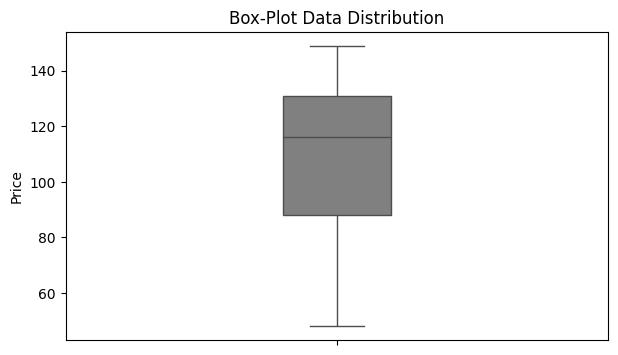

In [105]:
plt.figure(figsize=(7,4))
sns.boxplot(nvdf['Close/Last'], color='grey', width=0.2)
plt.title('Box-Plot Data Distribution')
plt.ylabel('Price')
plt.show()

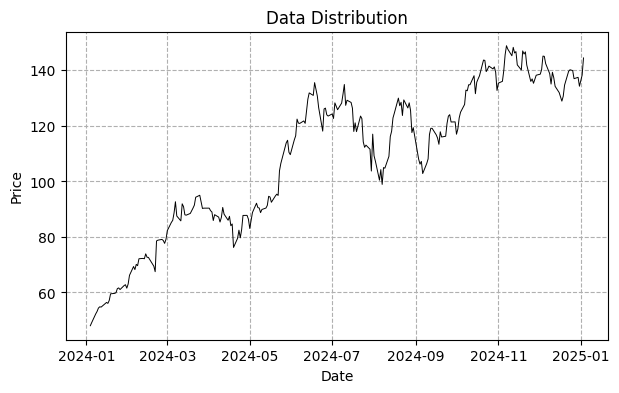

In [107]:
plt.figure(figsize=(7,4))
sns.lineplot(x=nvdf['Date'],y=nvdf['Close/Last'], color='black', linewidth=0.7)
plt.title('Data Distribution')
plt.ylabel('Price')
plt.xlabel('Date')
plt.grid(True, linestyle='--')
plt.show()

#### Log Returns
Log Returns are compounded continously rather than discretely, which alligns better with real world finance modellng. 

In [108]:
nvdfu = pd.DataFrame()
nvdfu['Date'] = nvdf['Date']
for column in nvdf.columns[1:2]:
    nvdfu[column] = np.log(nvdf[column] / nvdf[column].shift(1))

In [109]:
nvdfu

,Date,Close/Last
0,2025-01-03,NaN
1,2025-01-02,-0.043574
2,2024-12-31,-0.029496
3,2024-12-30,0.023550
4,2024-12-27,-0.003497
...,...,...
247,2024-01-10,-0.008647
248,2024-01-09,-0.022515
249,2024-01-08,-0.016833
250,2024-01-05,-0.062299


In [110]:
nvdfu.dropna(inplace=True)
nvdfu

,Date,Close/Last
1,2025-01-02,-0.043574
2,2024-12-31,-0.029496
3,2024-12-30,0.023550
4,2024-12-27,-0.003497
5,2024-12-26,0.021088
...,...,...
247,2024-01-10,-0.008647
248,2024-01-09,-0.022515
249,2024-01-08,-0.016833
250,2024-01-05,-0.062299


#### Summary Stats
A concise numerical description of the main features of Nvidia.

In [111]:
nvdfu['Close/Last'].describe().round(2)

count    251.00
mean      -0.00
std        0.03
min       -0.15
25%       -0.02
50%       -0.00
75%        0.02
max        0.11
Name: Close/Last, dtype: float64

In [112]:
nvdfu_skew = skew(nvdfu['Close/Last'])
nvdfu_kurtosis = kurtosis(nvdfu['Close/Last'])

print(f'Skewness: {nvdfu_skew:.2f}')
print(f'Kurtosis: {nvdfu_kurtosis:.2f}')

Skewness: -0.15
Kurtosis: 2.09


##### Plots
Histogram & Quartile to Quartile (QQ) plots.

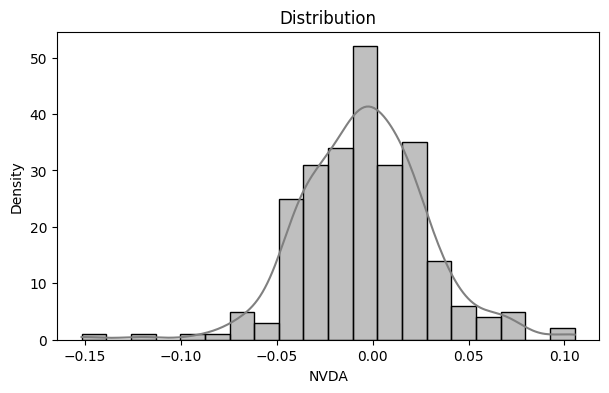

In [114]:
plt.figure(figsize=(7,4))
sns.histplot(nvdfu['Close/Last'], kde=True, bins=20, color='grey')
plt.title('Distribution') 
plt.ylabel('Density')
plt.xlabel('NVDA')
plt.show()

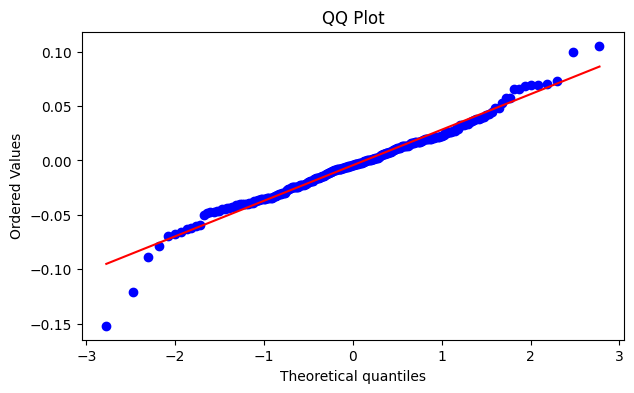

In [115]:
plt.figure(figsize=(7,4))
stats.probplot(nvdfu['Close/Last'], dist='norm', plot=plt)
plt.title('QQ Plot')
plt.show()

## NASDAQ Data Exploration
Data exploration is the process of analyzing and investigating a dataset to understand its structure, characteristics, and patterns. The following exploration is conducted for NASDAQ.

### Data Manipulation
This section includes the process of cleansing and structuring of Nvidia stock price data for actionable insights.

In [116]:
nasdf = pd.read_csv('/Users/ranjithramachandran/Downloads/NVDA/histdataNASDAQ_1Y.csv')

In [117]:
nasdf.head(5)

,Date,Close/Last,Open,High,Low
0,01/03/2025,19621.68,19395.51,19638.66,19379.57
1,01/02/2025,19280.79,19403.90,19517.87,19117.59
2,12/31/2024,19310.79,19551.36,19563.72,19283.41
3,12/30/2024,19486.78,19460.41,19622.93,19342.51
4,12/27/2024,19722.03,19896.77,19904.77,19553.40


In [118]:
nasdf.tail(5)

,Date,Close/Last,Open,High,Low
245,01/12/2024,14972.76,15001.01,15047.25,14931.88
246,01/11/2024,14970.18,15020.95,15063.61,14800.38
247,01/10/2024,14969.65,14877.70,14998.20,14842.70
248,01/09/2024,14857.71,14744.13,14894.32,14716.71
249,01/08/2024,14843.77,14564.47,14846.90,14560.20


#### Date Time Conversion
Date column requires a conversion to the date time format.

In [119]:
nasdf['Date'] = pd.to_datetime(nasdf['Date'])
nasdf

,Date,Close/Last,Open,High,Low
0,2025-01-03,19621.68,19395.51,19638.66,19379.57
1,2025-01-02,19280.79,19403.90,19517.87,19117.59
2,2024-12-31,19310.79,19551.36,19563.72,19283.41
3,2024-12-30,19486.78,19460.41,19622.93,19342.51
4,2024-12-27,19722.03,19896.77,19904.77,19553.40
...,...,...,...,...,...
245,2024-01-12,14972.76,15001.01,15047.25,14931.88
246,2024-01-11,14970.18,15020.95,15063.61,14800.38
247,2024-01-10,14969.65,14877.70,14998.20,14842.70
248,2024-01-09,14857.71,14744.13,14894.32,14716.71


#### Data Type Conversion
To identify data types and convert them to the required format for exploration.

In [120]:
print(nasdf.dtypes)

Date          datetime64[ns]
Close/Last           float64
Open                 float64
High                 float64
Low                  float64
dtype: object


#### Missing Values
To identify missing values in the dataframe.

In [121]:
nasdf.isna().sum()

Date          0
Close/Last    0
Open          0
High          0
Low           0
dtype: int64

In [122]:
nasdf.round(2)

,Date,Close/Last,Open,High,Low
0,2025-01-03,19621.68,19395.51,19638.66,19379.57
1,2025-01-02,19280.79,19403.90,19517.87,19117.59
2,2024-12-31,19310.79,19551.36,19563.72,19283.41
3,2024-12-30,19486.78,19460.41,19622.93,19342.51
4,2024-12-27,19722.03,19896.77,19904.77,19553.40
...,...,...,...,...,...
245,2024-01-12,14972.76,15001.01,15047.25,14931.88
246,2024-01-11,14970.18,15020.95,15063.61,14800.38
247,2024-01-10,14969.65,14877.70,14998.20,14842.70
248,2024-01-09,14857.71,14744.13,14894.32,14716.71


### Exploratory Data Analysis
EDA can help uncover patterns, detect anomalies, check assumptions, and extract insights for Nvidia.

In [123]:
nasdf['Close/Last'].describe().round(2)

count      250.00
mean     17307.47
std       1345.85
min      14843.77
25%      16175.76
50%      17268.28
75%      18283.07
max      20173.89
Name: Close/Last, dtype: float64

#### Data Distribution using Quartiles

In [124]:
q1 = np.percentile(nasdf['Close/Last'], 25)
q2 = np.percentile(nasdf['Close/Last'], 50) 
q3 = np.percentile(nasdf['Close/Last'], 75)
iqr = q3 - q1

print(f'Q1: {q1}, Q2: {q2}, Q3: {q3}')
print(f'IQR: {iqr:.2f}')

Q1: 16175.76, Q2: 17268.28, Q3: 18283.07
IQR: 2107.31


<function matplotlib.pyplot.show(close=None, block=None)>

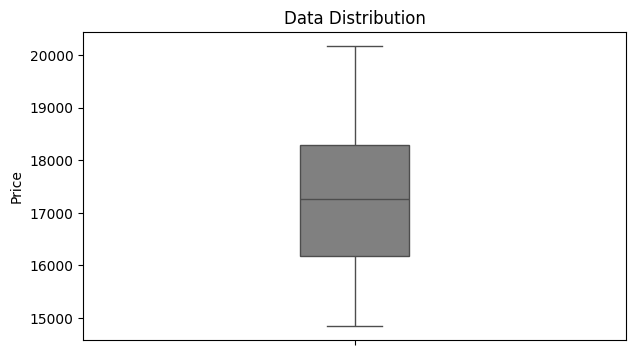

In [125]:
plt.figure(figsize=(7,4))
sns.boxplot(nasdf['Close/Last'], color='grey', width=0.2)
plt.title('Data Distribution')
plt.ylabel('Price')
plt.show

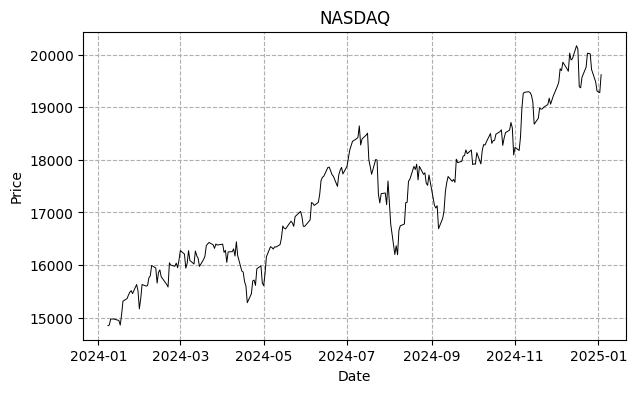

In [126]:
plt.figure(figsize=(7,4))
sns.lineplot(x=nasdf['Date'], y=nasdf['Close/Last'], color='black', linewidth=0.7)
plt.title('NASDAQ')
plt.xlabel('Date')
plt.ylabel('Price')
plt.grid(True, linestyle='--')
plt.show()

#### Log Returns
Log Returns are compounded continously rather than discretely, which alligns better with real world finance modellng.

In [127]:
nasdfu = pd.DataFrame()
nasdfu['Date'] = nasdf['Date']
for column in nasdf.columns[1:2]:
    nasdfu[column] = np.log(nasdf[column] / nasdf[column].shift(1))

In [128]:
nasdfu

,Date,Close/Last
0,2025-01-03,NaN
1,2025-01-02,-0.017526
2,2024-12-31,0.001555
3,2024-12-30,0.009072
4,2024-12-27,0.012000
...,...,...
245,2024-01-12,0.001899
246,2024-01-11,-0.000172
247,2024-01-10,-0.000035
248,2024-01-09,-0.007506


In [129]:
nasdfu.dropna(inplace=True)
nasdfu

,Date,Close/Last
1,2025-01-02,-0.017526
2,2024-12-31,0.001555
3,2024-12-30,0.009072
4,2024-12-27,0.012000
5,2024-12-26,0.015013
...,...,...
245,2024-01-12,0.001899
246,2024-01-11,-0.000172
247,2024-01-10,-0.000035
248,2024-01-09,-0.007506


#### Summary Stats
A concise numerical description of the main features of Nvidia.

In [130]:
nasdfu['Close/Last'].describe().round(2)

count    249.00
mean      -0.00
std        0.01
min       -0.03
25%       -0.01
50%       -0.00
75%        0.00
max        0.04
Name: Close/Last, dtype: float64

In [131]:
nasdfu_skew = skew(nasdfu['Close/Last'])
nasdfu_kurtosis = kurtosis(nasdfu['Close/Last'])

print(f'Skewness: {nasdfu_skew:.2f}')
print(f'Kurtosis: {nasdfu_kurtosis:.2f}')

Skewness: 0.56
Kurtosis: 1.16


##### Plots
Histogram & Quartile to Quartile (QQ) plots.

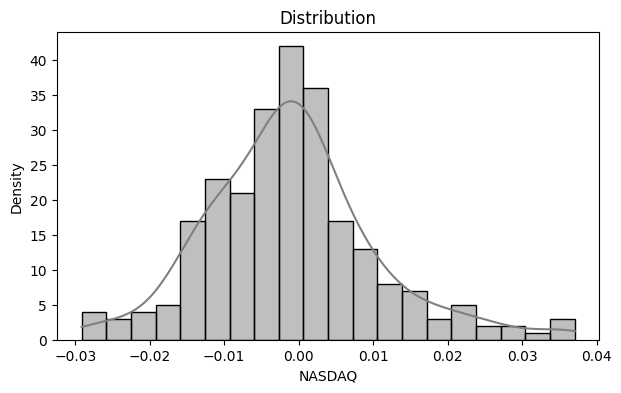

In [132]:
plt.figure(figsize=(7,4))
sns.histplot(nasdfu['Close/Last'], kde=True, bins=20, color='grey')
plt.title('Distribution')
plt.ylabel('Density')
plt.xlabel('NASDAQ')
plt.show()

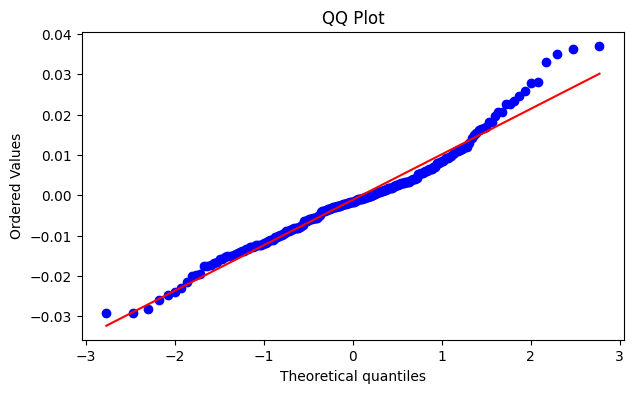

In [133]:
plt.figure(figsize=(7,4))
stats.probplot(nasdfu['Close/Last'], dist='norm', plot=plt)
plt.title('QQ Plot')
plt.show()

In [179]:
nvdfu.to_csv('/Users/ranjithramachandran/Downloads/NVDA/nvda.csv')

In [180]:
nasdfu.to_csv('/Users/ranjithramachandran/Downloads/NVDA/nasdaq.csv')

## Correlation (NVDA:NASDAQ)
A correlation analysis is a statistical measure that describes the relationship between two variables and it is conducted to determine how strong two variables are related to each other. It is important to analyse this relation betweeen NASDAQ and Nvidia to to prepare an analogous model. 

In [89]:
codf = pd.read_csv('/Users/ranjithramachandran/Downloads/NVDA/combined.csv')
codf.drop(codf.columns[[0,1]], axis=1, inplace=True)
codf

,NVDA,NASDAQ
0,-0.043574,-0.017526
1,-0.029496,0.001555
2,0.023550,0.009072
3,-0.003497,0.012000
4,0.021088,0.015013
...,...,...
246,-0.008647,-0.000035
247,-0.022515,-0.007506
248,-0.016833,-0.000939
249,-0.062299,NaN


In [90]:
codf.isna().sum()

NVDA      0
NASDAQ    2
dtype: int64

In [91]:
codf.drop([249,250], inplace=True)

In [92]:
codf.corr().style.background_gradient(cmap='Blues')

,NVDA,NASDAQ
NVDA,1.000000,0.733686
NASDAQ,0.733686,1.000000


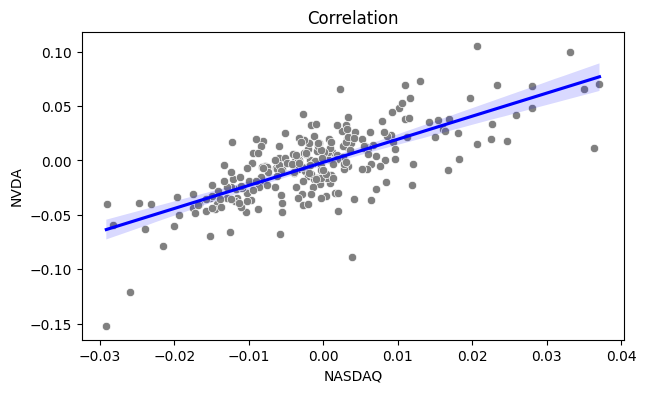

In [93]:
plt.figure(figsize=(7,4))
sns.scatterplot(x=codf['NASDAQ'], y=codf['NVDA'], color='grey')
sns.regplot(x=codf['NASDAQ'], y=codf['NVDA'], scatter=False, color='blue')
plt.title('Correlation')
plt.xlabel('NASDAQ')
plt.ylabel('NVDA')
plt.show()

### Correlation (Quarterly Analysis)
Quarterly analysis can help quantify the correlation for a quarter. This is essential as it helps evaluate when correlation can be strong or weak during specific periods of the study. Rolling correlation also can visualise these facets of strong and weak correlation.  

In [100]:
codf = pd.read_csv('/Users/ranjithramachandran/Downloads/NVDA/combined.csv')
codf.drop(codf.columns[[0]], axis=1, inplace=True)
codf.drop([249,250], inplace=True)

In [101]:
codf['Date'] = pd.to_datetime(codf['Date'], dayfirst=True)
codf.set_index('Date', inplace=True) # Date must be set as the index to resample the data quarterly
codf

/var/folders/v5/b_v1l7fx3qj0p875_h76hggr0000gn/T/ipykernel_36269/3223578402.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  codf['Date'] = pd.to_datetime(codf['Date'], dayfirst=True)


,NVDA,NASDAQ
Date,,
2025-01-02,-0.043574,-0.017526
2024-12-31,-0.029496,0.001555
2024-12-30,0.023550,0.009072
2024-12-27,-0.003497,0.012000
2024-12-26,0.021088,0.015013
...,...,...
2024-01-12,-0.030103,0.001899
2024-01-11,0.002045,-0.000172
2024-01-10,-0.008647,-0.000035


In [102]:
# Quarters are determined based on the dates
codf['Quarter'] = codf.index.to_period('Q')
def compute_corr(group):
    return group.corr()
quart_codf = codf.groupby('Quarter').apply(compute_corr)
codf

,NVDA,NASDAQ,Quarter
Date,,,
2025-01-02,-0.043574,-0.017526,2025Q1
2024-12-31,-0.029496,0.001555,2024Q4
2024-12-30,0.023550,0.009072,2024Q4
2024-12-27,-0.003497,0.012000,2024Q4
2024-12-26,0.021088,0.015013,2024Q4
...,...,...,...
2024-01-12,-0.030103,0.001899,2024Q1
2024-01-11,0.002045,-0.000172,2024Q1
2024-01-10,-0.008647,-0.000035,2024Q1


In [104]:
# Quarterly correlation is computed
corr_2024Q1 = quart_codf.loc['2024Q1']
corr_2024Q2 = quart_codf.loc['2024Q2']
corr_2024Q3 = quart_codf.loc['2024Q3']
corr_2024Q4 = quart_codf.loc['2024Q4']

print(corr_2024Q1)
print(corr_2024Q2)
print(corr_2024Q3)
print(corr_2024Q4)

            NVDA    NASDAQ
NVDA    1.000000  0.695979
NASDAQ  0.695979  1.000000
            NVDA    NASDAQ
NVDA    1.000000  0.668343
NASDAQ  0.668343  1.000000
            NVDA    NASDAQ
NVDA    1.000000  0.863559
NASDAQ  0.863559  1.000000
            NVDA    NASDAQ
NVDA    1.000000  0.588187
NASDAQ  0.588187  1.000000


### Rolling Correlation (60 days)

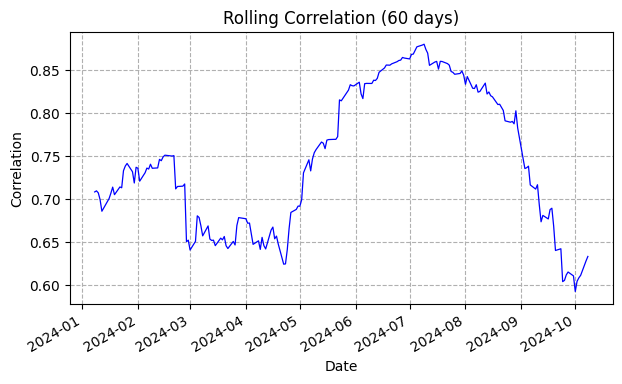

In [108]:
rolling_corr = codf['NASDAQ'].rolling(window=60).corr(codf['NVDA']) # Rolling correlation for 60 days is calculated using the rolling attribute

plt.figure(figsize=(7,4))
rolling_corr.plot(color='blue', linewidth=0.9)
plt.title('Rolling Correlation (60 days)')
plt.xlabel('Date')
plt.ylabel('Correlation')
plt.grid(True, which='both', linestyle='--')
plt.show()

## Event Study
An event study is used to examine specific events and the goal is to analyse the abnormal returns (the returns that are above or below what would be expected based on the market's overall performance) that occur around the event. The following Nvidia and NADAQ events are considered for analysis:

Nvidia / NASDAQ Market Events:
* Quarterly Earnings announcements - 21/02/2024, 22/05/2024, 28/08/2024 & 20/11/2024
* Tech sell off (Nvidia affected) - 17/07/2024
* Concerns over AI development (Nvidia tumbled 10%) - 03/09/2024
* Nvidia set to join Dow Jones Industrial Average - 01/11/2024
* NASDQ gained (20,000 pts) fueled by Nvidia - 11/12/2024

Nvidia's Business Events:
* Nvidia shift from TSMC CoWos-S to CoWos-L as its packaging capacity for Blackwell architecture - 16/01/2024
* Nvidia unveiled RTX 50 for integration of AI and neural rendering - 16/01/2024
* Nvidia's new open access LLMs to help developers for generative AI - 28/02/2024
* Nvidia's computational lithography production and Nvidia & AWS collaboration - 18/03/2024
* Nvidia builds Llama 3.1 genrative AI model - 23/07/2024
* Nvidia accelerates humanoid robotics development - 29/07/2024
* Nvidi's AI summit - 10/10/2024

In [2]:
codf = pd.read_csv('/Users/ranjithramachandran/Downloads/NVDA/combined.csv')
codf.drop(codf.columns[[0]], axis=1, inplace=True)
codf.drop([249,250], inplace=True)

### Generate Alpha and Beta values
Alpha and Beta values are generated to calculate expected return for Nvidia.


In [3]:
x = sm.add_constant(codf['NASDAQ'])
y = codf['NVDA']
model = sm.OLS(y,x).fit()
alpha = model.params['const']
beta = model.params['NASDAQ']
print(f'Alpha: {alpha:.6f}')
print(f'Beta: {beta:.6f}')

Alpha: -0.001708
Beta: 2.120104


### Expected Return
Expected return is the anticipated or average return on an investment over a specified period. The return is modelled(predicted) using alpha and beta values.

In [4]:
codf['Expected_Return'] = model.predict(x)
codf

,Date,NVDA,NASDAQ,Expected_Return
0,02/01/25,-0.043574,-0.017526,-0.038865
1,31/12/24,-0.029496,0.001555,0.001588
2,30/12/24,0.023550,0.009072,0.017526
3,27/12/24,-0.003497,0.012000,0.023733
4,26/12/24,0.021088,0.015013,0.030122
...,...,...,...,...
244,12/01/24,-0.030103,0.001899,0.002318
245,11/01/24,0.002045,-0.000172,-0.002074
246,10/01/24,-0.008647,-0.000035,-0.001783
247,09/01/24,-0.022515,-0.007506,-0.017622


### Abnormal Return
Abnormal returns refer to the difference between the actual returns and expected returns over a specific period.

In [5]:
codf['AB_Return'] = codf['NVDA'] - codf['Expected_Return']
codf

,Date,NVDA,NASDAQ,Expected_Return,AB_Return
0,02/01/25,-0.043574,-0.017526,-0.038865,-0.004710
1,31/12/24,-0.029496,0.001555,0.001588,-0.031084
2,30/12/24,0.023550,0.009072,0.017526,0.006024
3,27/12/24,-0.003497,0.012000,0.023733,-0.027230
4,26/12/24,0.021088,0.015013,0.030122,-0.009034
...,...,...,...,...,...
244,12/01/24,-0.030103,0.001899,0.002318,-0.032422
245,11/01/24,0.002045,-0.000172,-0.002074,0.004119
246,10/01/24,-0.008647,-0.000035,-0.001783,-0.006864
247,09/01/24,-0.022515,-0.007506,-0.017622,-0.004893


### Event Window Function
An event window is created in an event study to define the time period during which the market's reaction to a specific event is observed. The event window allows to examine the abnormal returns of Nvidia and NASDAQ in response to the event, and to assess whether the event had a significant impact on its price.

In [22]:
event_dates = ['16-01-2024', '21-02-2024', '28-02-2024', '18-03-2024', '22-05-2024', '17-07-2024', '23-07-2024', '28-08-2024', '03-09-2024', '10-10-2024', '01-11-2024', '20-11-2024', '11-12-2024']
codf['Date'] = pd.to_datetime(codf['Date'], format='%d/%m/%y')

def nvdawin(dataframe, event_dates, window_range):
    event_window_data = []
    event_dates = pd.to_datetime(event_dates)
    for event_date in event_dates:
        start_date = event_date + pd.Timedelta(days=window_range[0]) # Timedelta is utilised to find out the difference between two dates
        end_date = event_date + pd.Timedelta(days=window_range[1])

        window_data = dataframe[(dataframe['Date'] >= start_date) & (dataframe['Date'] <= end_date)].copy()
        window_data['Event_Date'] = event_date
        window_data['Window'] = (window_data['Date'] - event_date).dt.days

        event_window_data.append(window_data)
    
    return pd.concat(event_window_data, ignore_index=True)

In [94]:
window = nvdawin(codf, event_dates, (-3,3))
print(window)

         Date      NVDA    NASDAQ  Events Event_Date  Window
0  2024-01-19 -0.002736 -0.003216       0 2024-01-16       3
1  2024-01-18 -0.040898 -0.016816       0 2024-01-16       2
2  2024-01-17 -0.018629 -0.013375       0 2024-01-16       1
3  2024-01-16  0.005852  0.005955       0 2024-01-16       0
4  2024-02-23 -0.003483  0.001287       0 2024-02-21       2
..        ...       ...       ...     ...        ...     ...
57 2024-12-13  0.016902 -0.012328       0 2024-12-11       2
58 2024-12-12  0.022756 -0.001199       0 2024-12-11       1
59 2024-12-11  0.014242  0.006613       0 2024-12-11       0
60 2024-12-10 -0.030909 -0.017505       0 2024-12-11      -1
61 2024-12-09  0.027313  0.002509       0 2024-12-11      -2

[62 rows x 6 columns]


/var/folders/v5/b_v1l7fx3qj0p875_h76hggr0000gn/T/ipykernel_17149/1745204786.py:6: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  event_dates = pd.to_datetime(event_dates)


### Merge primary dataframe with event window dataframe

In [199]:
mer_codf = pd.merge(codf, window, on='Date', how='left')
mer_codf

,Date,NVDA_x,NASDAQ_x,Expected_Return_x,AB_Return_x,NVDA_y,NASDAQ_y,Expected_Return_y,AB_Return_y,Event_Date,Window
0,2025-01-02,-0.043574,-0.017526,-0.038865,-0.004710,NaN,NaN,NaN,NaN,NaT,NaN
1,2024-12-31,-0.029496,0.001555,0.001588,-0.031084,NaN,NaN,NaN,NaN,NaT,NaN
2,2024-12-30,0.023550,0.009072,0.017526,0.006024,NaN,NaN,NaN,NaN,NaT,NaN
3,2024-12-27,-0.003497,0.012000,0.023733,-0.027230,NaN,NaN,NaN,NaN,NaT,NaN
4,2024-12-26,0.021088,0.015013,0.030122,-0.009034,NaN,NaN,NaN,NaN,NaT,NaN
...,...,...,...,...,...,...,...,...,...,...,...
244,2024-01-12,-0.030103,0.001899,0.002318,-0.032422,NaN,NaN,NaN,NaN,NaT,NaN
245,2024-01-11,0.002045,-0.000172,-0.002074,0.004119,NaN,NaN,NaN,NaN,NaT,NaN
246,2024-01-10,-0.008647,-0.000035,-0.001783,-0.006864,NaN,NaN,NaN,NaN,NaT,NaN
247,2024-01-09,-0.022515,-0.007506,-0.017622,-0.004893,NaN,NaN,NaN,NaN,NaT,NaN


### Cumulative Abnormal Return
Cumulative Abnormal Returns (CAR) is a metric used to measure the total impact of an event on a specific time period. It is calculated by summing up the abnormal returns (AR) over the event window. This approach captures the aggregate effect of an event rather than just looking at the abnormal return on a single day.

In [200]:
mer_codf['Cumulative_AB_Return'] = (1 + mer_codf['AB_Return_x']).cumprod() - 1

In [272]:
codfu = pd.read_csv('/Users/ranjithramachandran/Downloads/NVDA/merged.csv')

In [273]:
codfu['Date'] = pd.to_datetime(codfu['Date'], format='%d/%m/%y')
codfu = codfu.sort_values(by='Date', ascending=True)
codfu.set_index('Date', inplace=True)
codfu

,NVDA,NASDAQ,Expected_Return,AB_Return,Event_Date,Window,Cumulative_AB_Return
Date,,,,,,,
2024-01-08,-0.016833,-0.000939,-0.003698,-0.013134,NaN,NaN,-0.060407
2024-01-09,-0.022515,-0.007506,-0.017622,-0.004893,NaN,NaN,-0.047902
2024-01-10,-0.008647,-0.000035,-0.001783,-0.006864,NaN,NaN,-0.043220
2024-01-11,0.002045,-0.000172,-0.002074,0.004119,NaN,NaN,-0.036608
2024-01-12,-0.030103,0.001899,0.002318,-0.032422,NaN,NaN,-0.040559
...,...,...,...,...,...,...,...
2024-12-26,0.021088,0.015013,0.030122,-0.009034,NaN,NaN,-0.064781
2024-12-27,-0.003497,0.012000,0.023733,-0.027230,NaN,NaN,-0.056256
2024-12-30,0.023550,0.009072,0.017526,0.006024,NaN,NaN,-0.029838


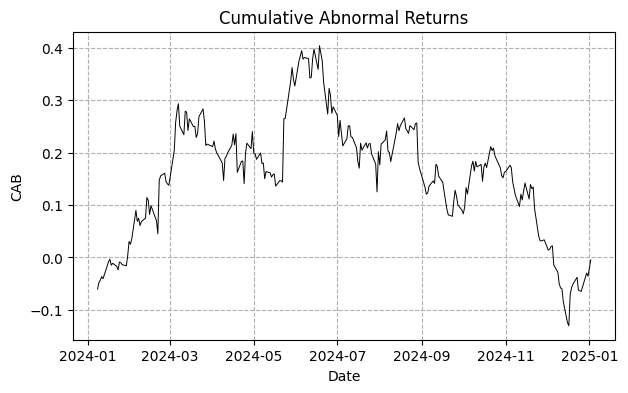

In [315]:
plt.figure(figsize=(7,4))
sns.lineplot(x=codfu.index, y=codfu['Cumulative_AB_Return'], color='Black', linewidth='0.7')
plt.title('Cumulative Abnormal Returns')
plt.xlabel('Date')
plt.ylabel('CAB')
plt.grid(True, which='both', linestyle='--')

### Event Window - Cumulative Abnormal Return
The following CAR visualisations are performed for quarterly earnings announcement. All quarterly announcements show a significant fall in the Nvidia's stock price followed by a surge (6% - 14% on average) which captures the unpredicabilty in the stock price.  

/var/folders/v5/b_v1l7fx3qj0p875_h76hggr0000gn/T/ipykernel_10551/967963996.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  q1cab['Event_CAB'] = (1 + q1cab['AB_Return']).cumprod() - 1


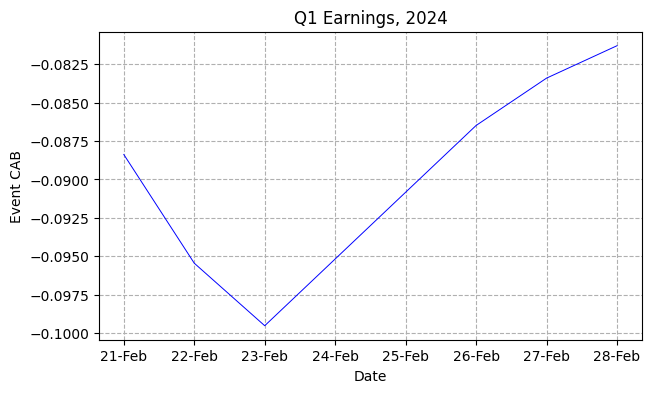

In [321]:
q1cab = codfu.iloc[30:36]
q1cab['Event_CAB'] = (1 + q1cab['AB_Return']).cumprod() - 1
q1cab

plt.figure(figsize=(7,4))
sns.lineplot(x=q1cab.index, y=q1cab['Event_CAB'], color='Blue',  linewidth='0.7')
plt.title('Q1 Earnings, 2024')
plt.xlabel('Date')
plt.ylabel('Event CAB')
plt.gca().xaxis.set_major_formatter(DateFormatter('%d-%b'))
plt.grid(True, which='both', linestyle='--')
plt.show()

/var/folders/v5/b_v1l7fx3qj0p875_h76hggr0000gn/T/ipykernel_10551/321400786.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  q2cab['Event_CAB'] = (1 + q2cab['AB_Return']).cumprod() - 1


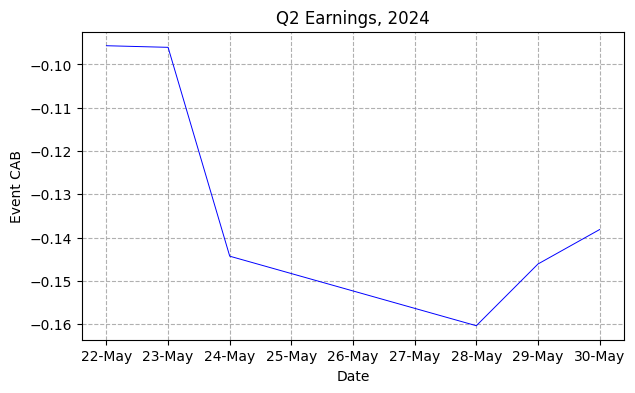

In [322]:
q2cab = codfu.iloc[94:100]
q2cab['Event_CAB'] = (1 + q2cab['AB_Return']).cumprod() - 1
q2cab

plt.figure(figsize=(7,4))
sns.lineplot(x=q2cab.index, y=q2cab['Event_CAB'], color='Blue', linewidth='0.7')
plt.title('Q2 Earnings, 2024')
plt.xlabel('Date')
plt.ylabel('Event CAB')
plt.gca().xaxis.set_major_formatter(DateFormatter('%d-%b'))
plt.grid(True, which='both', linestyle='--')
plt.show()

/var/folders/v5/b_v1l7fx3qj0p875_h76hggr0000gn/T/ipykernel_10551/3422783296.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  q3cab['Event_CAB'] = (1 + q3cab['AB_Return']).cumprod() - 1


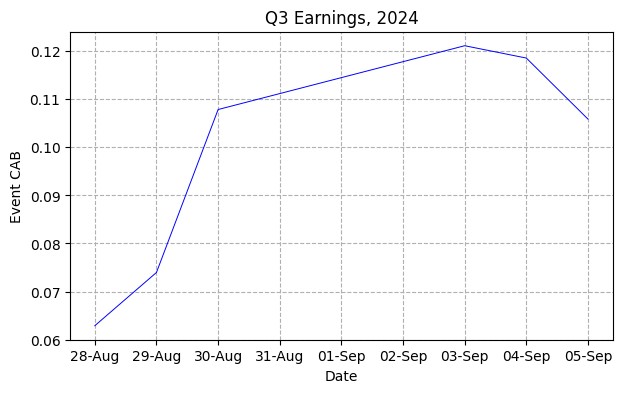

In [323]:
q3cab = codfu.iloc[161:167]
q3cab['Event_CAB'] = (1 + q3cab['AB_Return']).cumprod() - 1
q3cab

plt.figure(figsize=(7,4))
sns.lineplot(x=q3cab.index, y=q3cab['Event_CAB'], color='Blue',  linewidth='0.7')
plt.title('Q3 Earnings, 2024')
plt.xlabel('Date')
plt.ylabel('Event CAB')
plt.gca().xaxis.set_major_formatter(DateFormatter('%d-%b'))
plt.grid(True, which='both', linestyle='--')
plt.show()


/var/folders/v5/b_v1l7fx3qj0p875_h76hggr0000gn/T/ipykernel_10551/3001494639.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  q4cab['Event_CAB'] = (1 + q4cab['AB_Return']).cumprod() - 1


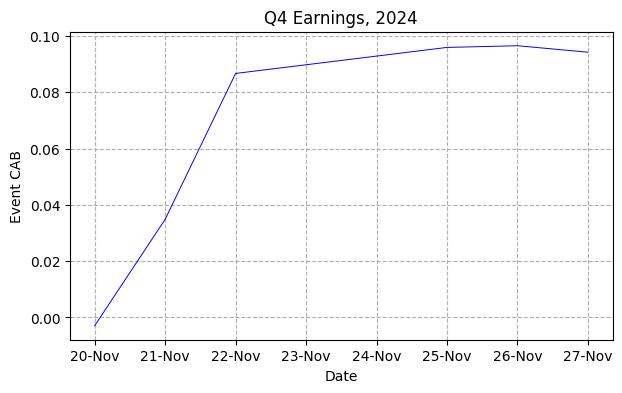

In [324]:
q4cab = codfu.iloc[220:226]
q4cab['Event_CAB'] = (1 + q4cab['AB_Return']).cumprod() - 1
q4cab

plt.figure(figsize=(7,4))
sns.lineplot(x=q4cab.index, y=q4cab['Event_CAB'], color='Blue',  linewidth='0.7')
plt.title('Q4 Earnings, 2024')
plt.xlabel('Date')
plt.ylabel('Event CAB')
plt.gca().xaxis.set_major_formatter(DateFormatter('%d-%b'))
plt.grid(True, which='both', linestyle='--')
plt.show()

## Control Variables
Control variables are variables to account for potential influence on the dependent variable (NASDAQ). These variables are not the primary focus of the study but are included to isolate the true relationship between the independent variable (NVDA) and the dependent variable, minimizing confounding effects. Historical S&P500 index prices, US Consumer Price Index (CPI) data and US Tresury Bills (1-year) yields are utilised as control variables for this study.

### S&P 500

In [5]:
spdf = pd.read_csv('/Users/ranjithramachandran/Downloads/NVDA/hisdataSP500_1Y.csv')
spdf['Date'] = pd.to_datetime(spdf['Date'])
spdf.drop(range(249,253), inplace=True)
spdf.drop(spdf.columns[[2,3,4]], axis=1, inplace=True)

/var/folders/v5/b_v1l7fx3qj0p875_h76hggr0000gn/T/ipykernel_39409/3565848.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  spdf['Date'] = pd.to_datetime(spdf['Date'])


In [6]:
spdf.rename(columns={'Close/Last': 'SP500'}, inplace=True)

In [7]:
spdfu = pd.DataFrame()
spdfu['Date'] = spdf['Date']
for column in spdf.columns[1:2]:
    spdfu[column] = np.log(spdf[column] / spdf[column].shift(1))

In [8]:
spdfu.dropna(inplace=True)
spdfu

,Date,SP500
1,2025-01-02,-0.012517
2,2024-12-31,0.002226
3,2024-12-30,0.004294
4,2024-12-27,0.010760
5,2024-12-26,0.011117
...,...,...
245,2024-01-12,0.003738
246,2024-01-11,-0.000751
247,2024-01-10,0.000671
248,2024-01-09,-0.005650


### Consumer Price Index (CPI)

In [9]:
cpidf = pd.read_csv('/Users/ranjithramachandran/Downloads/NVDA/CPIAUCSL.csv')
cpidf.rename(columns={'observation_date':'Date', 'CPIAUCSL':'CPI'}, inplace=True)
cpidf['Date'] = pd.to_datetime(cpidf['Date'])

/var/folders/v5/b_v1l7fx3qj0p875_h76hggr0000gn/T/ipykernel_39409/2890499194.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  cpidf['Date'] = pd.to_datetime(cpidf['Date'])


In [10]:
cpidfu = pd.DataFrame()
cpidfu['Date'] = cpidf['Date']
for column in cpidf.columns[1:2]:
    cpidfu[column] = np.log(cpidf[column] / cpidf[column].shift(1))

In [11]:
cpidfu['Date'] = pd.to_datetime(cpidfu['Date'], format='%Y-%m-%d')
cpidfu.dropna(inplace=True)
cpidfu

,Date,CPI
1,2024-01-01,0.003050
2,2024-02-01,0.004411
3,2024-03-01,0.003774
4,2024-04-01,0.003124
5,2024-05-01,0.000057
6,2024-06-01,-0.000562
7,2024-07-01,0.001548
8,2024-08-01,0.001870
9,2024-09-01,0.001797
10,2024-10-01,0.002438


In [12]:
cpidfu.set_index('Date', inplace=True) # Set 'Date' as the index to resample the data. The index will be reset once resampling is completed.
cpidfu = cpidfu.resample('D').ffill().reset_index() # Forward filling ensures that the monthly inflation data is applied to all days in the month.

In [13]:
cpidfu.drop(366, inplace=True)
cpidfu

,Date,CPI
0,2024-01-01,0.003050
1,2024-01-02,0.003050
2,2024-01-03,0.003050
3,2024-01-04,0.003050
4,2024-01-05,0.003050
...,...,...
361,2024-12-27,0.003924
362,2024-12-28,0.003924
363,2024-12-29,0.003924
364,2024-12-30,0.003924


### US Treasury Bills (1-Year)

In [14]:
tbdf = pd.read_csv('/Users/ranjithramachandran/Downloads/NVDA/DTB1YR.csv')
tbdf.rename(columns={'observation_date':'Date', 'DTB1YR':'TB1Y'}, inplace=True)

In [15]:
tbdf.isna().sum() # Missing Values

Date     0
TB1Y    12
dtype: int64

In [20]:
tbdf['TB1Y'] = tbdf['TB1Y'].fillna(method='ffill')

/var/folders/v5/b_v1l7fx3qj0p875_h76hggr0000gn/T/ipykernel_36269/96782941.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  tbdf['TB1Y'] = tbdf['TB1Y'].fillna(method='ffill')


In [16]:
tbdfu = pd.DataFrame()
tbdfu['Date'] = tbdf['Date']
for column in tbdf.columns[1:]:
    tbdfu[column] = np.log(tbdf[column] / tbdf[column].shift(1))

In [17]:
tbdfu['TB1Y'] = tbdfu['TB1Y'].fillna(0)
tbdfu

,Date,TB1Y
0,2024-01-04,0.000000
1,2024-01-05,0.000000
2,2024-01-08,-0.004348
3,2024-01-09,0.002176
4,2024-01-10,0.000000
...,...,...
256,2024-12-27,-0.007435
257,2024-12-30,-0.007491
258,2024-12-31,-0.002509
259,2025-01-01,0.000000


## Regression Analysis
This analysis is a quantitaive assessment of Nvidia's influence on NASDAQ. A linear regression is conducted by including control variables. The model is termed as 'Market Mover (MM)' as it tries to determine whether Nvidia acts as a significant market mover for the Nasdaq Composite Index in 2024. The model will aim to comprehend the relation between the variables (along with any interaction terms) and exhibit causation with Granger Causality. Causality is determined by developing a univariate and a multivaiate MM model with lagged variables.

In [3]:
codf = pd.read_csv('/Users/ranjithramachandran/Downloads/NVDA/combined.csv')
codf.drop(codf.columns[[0]], axis=1, inplace=True)
codf.drop([249,250], inplace=True)
codf['Date'] = pd.to_datetime(codf['Date'], format='%d/%m/%y')

### Merge control variables & main data frame (codf)

In [18]:
dfs = [codf, spdfu, cpidfu, tbdfu]
for df in dfs:
    df['Date'] = pd.to_datetime(df['Date'])
codf_reg = reduce(lambda left, right: pd.merge(left, right, on='Date', how='left'), dfs)

In [19]:
codf_reg.fillna(0, inplace=True)
codf_reg

,Date,NVDA,NASDAQ,SP500,CPI,TB1Y
0,2025-01-02,-0.043574,-0.017526,-0.012517,0.000000,0.000000
1,2024-12-31,-0.029496,0.001555,0.002226,0.003924,-0.002509
2,2024-12-30,0.023550,0.009072,0.004294,0.003924,-0.007491
3,2024-12-27,-0.003497,0.012000,0.010760,0.003924,-0.007435
4,2024-12-26,0.021088,0.015013,0.011117,0.003924,0.000000
...,...,...,...,...,...,...
244,2024-01-12,-0.030103,0.001899,0.003738,0.003050,-0.020023
245,2024-01-11,0.002045,-0.000172,-0.000751,0.003050,-0.013129
246,2024-01-10,-0.008647,-0.000035,0.000671,0.003050,0.000000
247,2024-01-09,-0.022515,-0.007506,-0.005650,0.003050,0.002176


### The Market Mover (MM) Model

In [20]:
x1 = codf_reg[['NVDA', 'SP500', 'CPI', 'TB1Y']]
x1 = sm.add_constant(x1)
y = codf_reg['NASDAQ']
model1 = sm.OLS(y,x1).fit()
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:                 NASDAQ   R-squared:                       0.943
Model:                            OLS   Adj. R-squared:                  0.942
Method:                 Least Squares   F-statistic:                     1003.
Date:                Mon, 27 Jan 2025   Prob (F-statistic):          3.73e-150
Time:                        20:40:55   Log-Likelihood:                 1118.1
No. Observations:                 249   AIC:                            -2226.
Df Residuals:                     244   BIC:                            -2209.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0001      0.000      0.369      0.7

The results indicate a positive movement in NASDAQ as Nvidia reporst a coefficient of 0.0707 with a p-value < 0.05.

#### MM Model with Events

In [23]:
codf_reg['Events'] = codf_reg['Date'].isin(event_dates).astype(int) # Events are created using binary values (0: non-events and 1: events)
codf_reg

/var/folders/v5/b_v1l7fx3qj0p875_h76hggr0000gn/T/ipykernel_39409/186336060.py:1: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  codf_reg['Events'] = codf_reg['Date'].isin(event_dates).astype(int)


,Date,NVDA,NASDAQ,SP500,CPI,TB1Y,Events
0,2025-01-02,-0.043574,-0.017526,-0.012517,0.000000,0.000000,0
1,2024-12-31,-0.029496,0.001555,0.002226,0.003924,-0.002509,0
2,2024-12-30,0.023550,0.009072,0.004294,0.003924,-0.007491,0
3,2024-12-27,-0.003497,0.012000,0.010760,0.003924,-0.007435,0
4,2024-12-26,0.021088,0.015013,0.011117,0.003924,0.000000,0
...,...,...,...,...,...,...,...
244,2024-01-12,-0.030103,0.001899,0.003738,0.003050,-0.020023,0
245,2024-01-11,0.002045,-0.000172,-0.000751,0.003050,-0.013129,1
246,2024-01-10,-0.008647,-0.000035,0.000671,0.003050,0.000000,0
247,2024-01-09,-0.022515,-0.007506,-0.005650,0.003050,0.002176,0


In [53]:
x2 = codf_reg[['NVDA', 'Events', 'SP500', 'CPI', 'TB1Y', ]]
x2 = sm.add_constant(x2)
y = codf_reg['NASDAQ']
model2 = sm.OLS(y, x2).fit()
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:                 NASDAQ   R-squared:                       0.942
Model:                            OLS   Adj. R-squared:                  0.941
Method:                 Least Squares   F-statistic:                     769.9
Date:                Mon, 27 Jan 2025   Prob (F-statistic):          6.75e-144
Time:                        22:06:02   Log-Likelihood:                 1086.0
No. Observations:                 242   AIC:                            -2160.
Df Residuals:                     236   BIC:                            -2139.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       7.486e-05      0.000      0.218      0.8

The results indicate that events (Nvidia) does create a positive impact and help in the movement of NASDAQ. 

##### Interaction Term (Effect)
An interaction effect occurs when the effect of one variable depends on the value of another variable. Interactions are particularly useful when you hypothesize that events do not have a uniform effect but instead depend on Nvidia's stock price. It helps to capture the dynamics unlike a simple additive model. Here, an interaction term is created (Events_NVDA1) by combining 'NVDA' and 'Events' variables.

In [52]:
codf_reg['Events_NVDA1'] = codf_reg['Events'] * codf_reg['NVDA'] # Interaction Term

codf_reg = codf_reg.dropna()

x2 = codf_reg[['NVDA', 'Events', 'Events_NVDA1', 'SP500', 'CPI', 'TB1Y']]
x2 = sm.add_constant(x2)
y = codf_reg['NASDAQ']
model2 = sm.OLS(y, x2).fit()
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:                 NASDAQ   R-squared:                       0.943
Model:                            OLS   Adj. R-squared:                  0.941
Method:                 Least Squares   F-statistic:                     644.2
Date:                Mon, 27 Jan 2025   Prob (F-statistic):          7.79e-143
Time:                        22:05:21   Log-Likelihood:                 1087.0
No. Observations:                 242   AIC:                            -2160.
Df Residuals:                     235   BIC:                            -2136.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0001      0.000      0.292   

The results indicate that the interaction term is negatively related to NASDAQ. However, the results cannot be finalised as the p-value > 0.05. The interaction effect will have to be rechecked using lagged values.

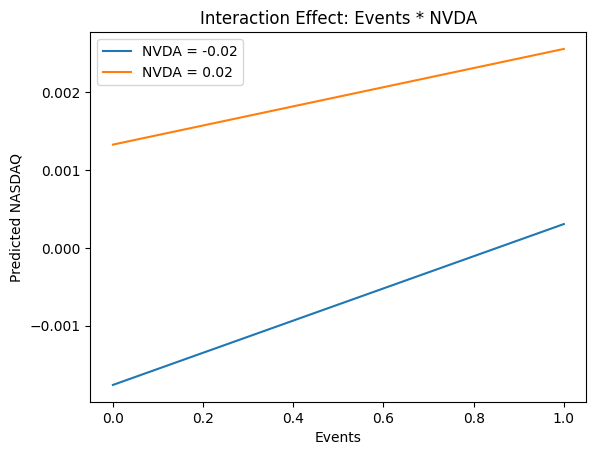

In [26]:
# Define a range of values for Events
events_values = np.linspace(codf_reg['Events'].min(), codf_reg['Events'].max(), 100)

# Predicted NASDAQ for different levels of NVDA
nvda_values = [codf_reg['NVDA'].quantile(0.25), codf_reg['NVDA'].quantile(0.75)]
for nvda in nvda_values:
    predicted_nasdaq = (
        model2.params['const'] +
        model2.params['NVDA'] * nvda +
        model2.params['Events'] * events_values +
        model2.params['Events_NVDA1'] * (events_values * nvda)  # Interaction term using NVDA
    )
    plt.plot(events_values, predicted_nasdaq, label=f"NVDA = {nvda:.2f}")

plt.xlabel("Events")
plt.ylabel("Predicted NASDAQ")
plt.title("Interaction Effect: Events * NVDA")
plt.legend()
plt.show()

### Residuals vs Prediction

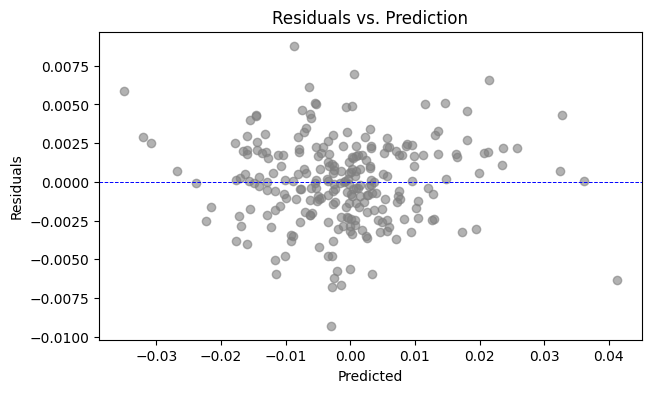

In [27]:
residuals1 = model1.resid
predicted1 = model1.fittedvalues

plt.figure(figsize=(7, 4))
plt.scatter(predicted1, residuals1, color='grey', alpha=0.6)
plt.axhline(0, color='blue', linestyle='--', linewidth=0.7)
plt.title('Residuals vs. Prediction')
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.show()

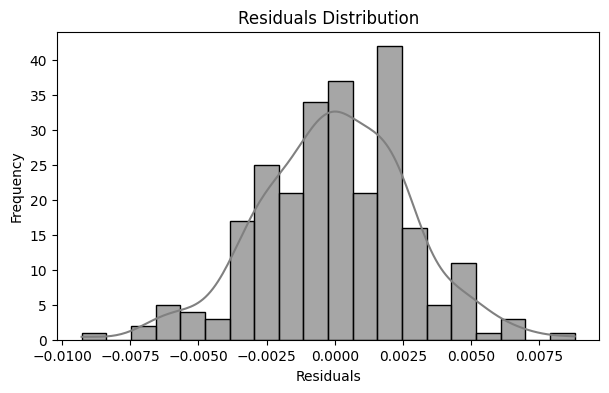

In [28]:
plt.figure(figsize=(7, 4))
sns.histplot(residuals1, bins=20, kde=True, color='grey', edgecolor='black', alpha=0.7)
plt.title('Residuals Distribution')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

The residuals are close to a normal distribution. 

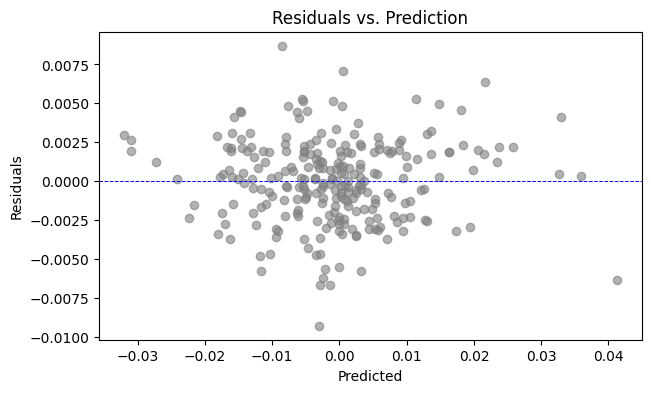

In [29]:
residuals2 = model2.resid
predicted2 = model2.fittedvalues

plt.figure(figsize=(7, 4))
plt.scatter(predicted2, residuals2, color='grey', alpha=0.6)
plt.axhline(0, color='blue', linestyle='--', linewidth=0.7)
plt.title('Residuals vs. Prediction')
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.show()

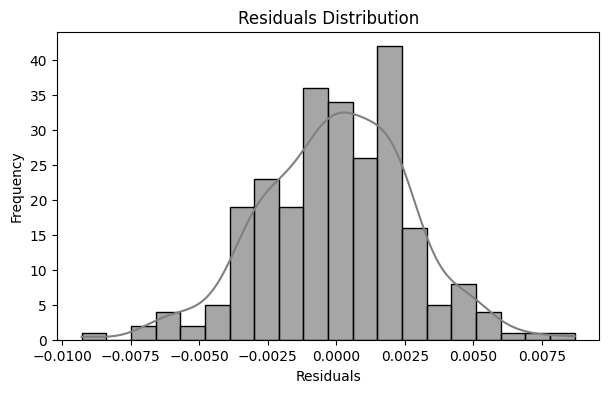

In [30]:
plt.figure(figsize=(7, 4))
sns.histplot(residuals2, bins=20, kde=True, color='grey', edgecolor='black', alpha=0.7)
plt.title('Residuals Distribution')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

The residuals are close to a normal distribution.

### White Test for Heteroskedasticity

In [31]:
white_test = diag.het_white(residuals1, x1)
lm_stat, lm_pvalue, f_stat, f_pvalue = white_test

print(f'LM test Stats: {lm_stat:.6f}')
print(f'LM test PValue: {lm_pvalue:.6f}')
print(f'F-Test Stats: {f_stat:.6f}')
print(f'F-Test PValue: {f_pvalue:.6f}')

LM test Stats: 16.782981
LM test PValue: 0.267927
F-Test Stats: 1.207989
F-Test PValue: 0.270156


In [32]:
white_test = diag.het_white(residuals2, x2)
lm_stat, lm_pvalue, f_stat, f_pvalue = white_test

print(f'LM test Stats: {lm_stat:.6f}')
print(f'LM test PValue: {lm_pvalue:.6f}')
print(f'F-Test Stats: {f_stat:.6f}')
print(f'F-Test PValue: {f_pvalue:.6f}')

LM test Stats: 16.443105
LM test PValue: 0.835654
F-Test Stats: 0.691686
F-Test PValue: 0.851890


White test results indicate the presence of homoskedasticity, thus concluding that the variance of the residuals in the model is constant.

### Granger Causality Test
Granger causality helps determine predictive relationships that refer to the ability of one time series to predict another time series based on its past values. The key idea behind Granger causality is that if variable 'NVDA' Granger-causes variable 'NASDAQ', past values of 'NVDA' help improve the prediction of future values of 'NASDAQ', beyond just using past values of 'NASDAQ'. The process involves 2 models, the univariate and multivariate models. The test compares the two models to understand if 'NVDA' granger causes 'NASDAQ'.

In [34]:
codf_reg.drop(columns=['Date'], inplace=True)

####  Augmented Dickey Fuller (ADF) Test for Stationarity

In [35]:
adf1 = adfuller(codf_reg['NVDA'])
print(f"ADF Stats: {adf1[0]:.6f}, p-value: {adf1[1]:.6f}")

ADF Stats: -17.205498, p-value: 0.000000


In [36]:
adf2 = adfuller(codf_reg['NASDAQ'])
print(f"ADF Stats: {adf2[0]:.6f}, p-value: {adf2[1]:.6f}")

ADF Stats: -15.657272, p-value: 0.000000


#### Vector Autoregression (VAR) for Lag Selection

In [37]:
model3 = VAR(codf_reg)
lags = model3.select_order(maxlags=30)
print(lags.summary())

 VAR Order Selection (* highlights the minimums)  
       AIC         BIC         FPE         HQIC   
--------------------------------------------------
0       -63.13      -63.03   3.810e-28      -63.09
1       -66.05     -65.18*  2.065e-29*      -65.70
2       -65.76      -64.14   2.760e-29      -65.11
3       -65.44      -63.05   3.826e-29      -64.48
4       -65.25      -62.11   4.659e-29      -63.98
5       -65.07      -61.17   5.617e-29      -63.50
6       -64.89      -60.23   6.823e-29      -63.01
7       -64.70      -59.28   8.448e-29      -62.51
8       -64.63      -58.45   9.323e-29      -62.13
9       -64.47      -57.54   1.129e-28      -61.67
10      -64.32      -56.62   1.387e-28      -61.21
11      -64.18      -55.73   1.683e-28      -60.77
12      -64.13      -54.92   1.906e-28      -60.41
13      -64.02      -54.05   2.317e-28      -60.00
14      -64.00      -53.28   2.623e-28      -59.67
15      -63.97      -52.49   3.057e-28      -59.34
16      -64.33      -52.09   2.

A BIC criterion is considered for this study. The order selection states '1' as lag for the study.

#### Univariate MM Model

In [38]:
codf_reg['NASDAQ_lag1'] = codf_reg['NASDAQ'].shift(1)
codf_reg = codf_reg.dropna()

x4 = sm.add_constant(codf_reg[['NASDAQ_lag1', 'Events']])
y = codf_reg['NASDAQ']
model4 = sm.OLS(y, x4).fit()
print(model4.summary())

                            OLS Regression Results                            
Dep. Variable:                 NASDAQ   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                 -0.006
Method:                 Least Squares   F-statistic:                    0.2296
Date:                Mon, 27 Jan 2025   Prob (F-statistic):              0.795
Time:                        20:42:50   Log-Likelihood:                 759.88
No. Observations:                 248   AIC:                            -1514.
Df Residuals:                     245   BIC:                            -1503.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -0.0012      0.001     -1.555      

#### Multivariate MM Model

In [44]:
codf_reg['NVDA_lag1'] = codf_reg['NVDA'].shift(1) # Lagged dependent and independent variables
codf_reg['NASDAQ_lag1'] = codf_reg['NASDAQ'].shift(1)

codf_reg['SP500_lag1'] = codf_reg['SP500'].shift(1) # Lagged control variables 
codf_reg['CPI_lag1'] = codf_reg['CPI'].shift(1)
codf_reg['TB1Y_lag1'] = codf_reg['TB1Y'].shift(1)

codf_reg = codf_reg.dropna()

x5 = sm.add_constant(codf_reg[['NASDAQ_lag1', 'NVDA_lag1', 'Events', 'SP500_lag1', 'CPI_lag1', 'TB1Y_lag1']])
y = codf_reg['NASDAQ']
model5 = sm.OLS(y, x5).fit()
print(model5.summary())

                            OLS Regression Results                            
Dep. Variable:                 NASDAQ   R-squared:                       0.017
Model:                            OLS   Adj. R-squared:                 -0.008
Method:                 Least Squares   F-statistic:                    0.6709
Date:                Mon, 27 Jan 2025   Prob (F-statistic):              0.673
Time:                        22:01:34   Log-Likelihood:                 755.01
No. Observations:                 246   AIC:                            -1496.
Df Residuals:                     239   BIC:                            -1471.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -0.0021      0.001     -1.455      

The results show that the past values of NVDA does not improve the prediction for NASDAQ, hence cannot conclude a true relationship between the variables. However, it is also significant to analyse any interaction effect that the Nvidia events have on NASDAQ.

#### Multivariate MM Model with Interaction Term (Effect)

In [50]:
codf_reg['NVDA_lag1'] = codf_reg['NVDA'].shift(1) # Lagged dependent and independent variables
codf_reg['NASDAQ_lag1'] = codf_reg['NASDAQ'].shift(1)

codf_reg['SP500_lag1'] = codf_reg['SP500'].shift(1) # Lagged control variables 
codf_reg['CPI_lag1'] = codf_reg['CPI'].shift(1)
codf_reg['TB1Y_lag1'] = codf_reg['TB1Y'].shift(1)

codf_reg['Events_NVDA2'] = codf_reg['Events'] * codf_reg['NVDA_lag1']  # Interaction Term

codf_reg = codf_reg.dropna()

x6 = sm.add_constant(codf_reg[['NASDAQ_lag1', 'NVDA_lag1', 'Events', 'Events_NVDA2', 'SP500_lag1', 'CPI_lag1', 'TB1Y_lag1']])
y = codf_reg['NASDAQ']
model6 = sm.OLS(y, x6).fit()
print(model6.summary())

                            OLS Regression Results                            
Dep. Variable:                 NASDAQ   R-squared:                       0.026
Model:                            OLS   Adj. R-squared:                 -0.003
Method:                 Least Squares   F-statistic:                    0.9016
Date:                Mon, 27 Jan 2025   Prob (F-statistic):              0.506
Time:                        22:04:31   Log-Likelihood:                 744.22
No. Observations:                 242   AIC:                            -1472.
Df Residuals:                     234   BIC:                            -1445.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.0021      0.001     -1.499   

As observed, the interaction term (coef: 0.2522) is significant at p-value < 0.10 which clearly indicate that formation of events can clearly predict the movement of NASDAQ. The low R-squared does however show a concern on the goodness of fit of the model. The results do provide the importance of interaction term for a model to prove the relationship between variables.

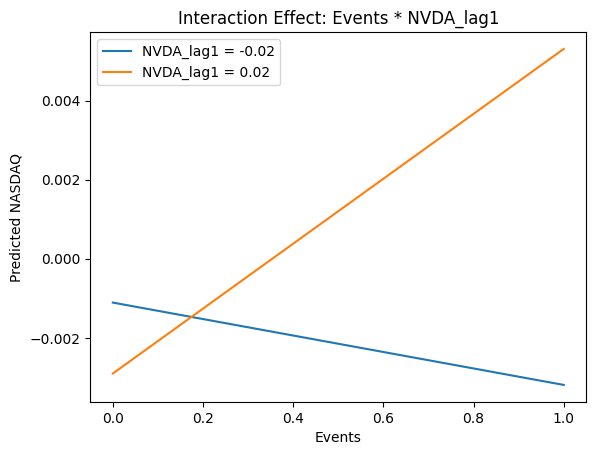

In [40]:
# Define a range of values for Events
events_values = np.linspace(codf_reg['Events'].min(), codf_reg['Events'].max(), 100)

# Predicted NASDAQ for different levels of NVDA_lag1
nvda_values = [codf_reg['NVDA_lag1'].quantile(0.25), codf_reg['NVDA_lag1'].quantile(0.75)]
for nvda in nvda_values:
    predicted_nasdaq = (
        model5.params['const'] +
        model5.params['NVDA_lag1'] * nvda +
        model5.params['Events'] * events_values +
        model5.params['Events_NVDA2'] * (events_values * nvda)
    )
    plt.plot(events_values, predicted_nasdaq, label=f"NVDA_lag1 = {nvda:.2f}")

plt.xlabel("Events")
plt.ylabel("Predicted NASDAQ")
plt.title("Interaction Effect: Events * NVDA_lag1")
plt.legend()
plt.show()

#### Residuals vs Prediction

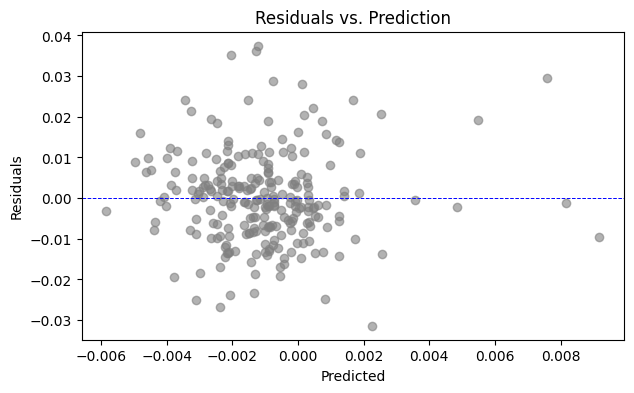

In [41]:
residuals5 = model5.resid
prediction5 = model5.fittedvalues

plt.figure(figsize=(7, 4))
plt.scatter(prediction5, residuals5, color='grey', alpha=0.6)
plt.axhline(0, color='blue', linestyle='--', linewidth=0.7)
plt.title('Residuals vs. Prediction')
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.show()

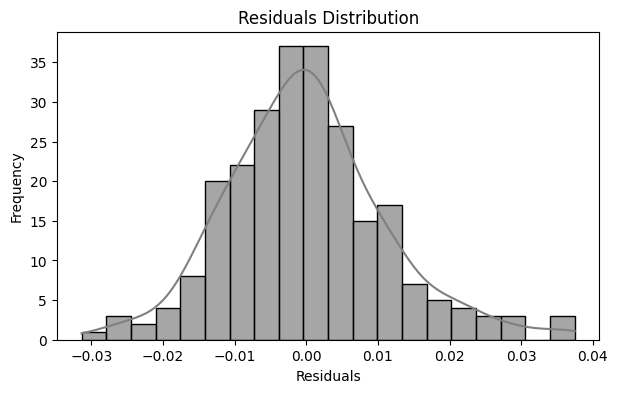

In [55]:
plt.figure(figsize=(7, 4))
sns.histplot(residuals5, bins=20, kde=True, color='grey', edgecolor='black', alpha=0.7)
plt.title('Residuals Distribution')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

##### Residual Plots
The following component-component plus residual (CCPR) plot analyse each independent variable to NASDAQ to understand the variance and any non-linear formation. 

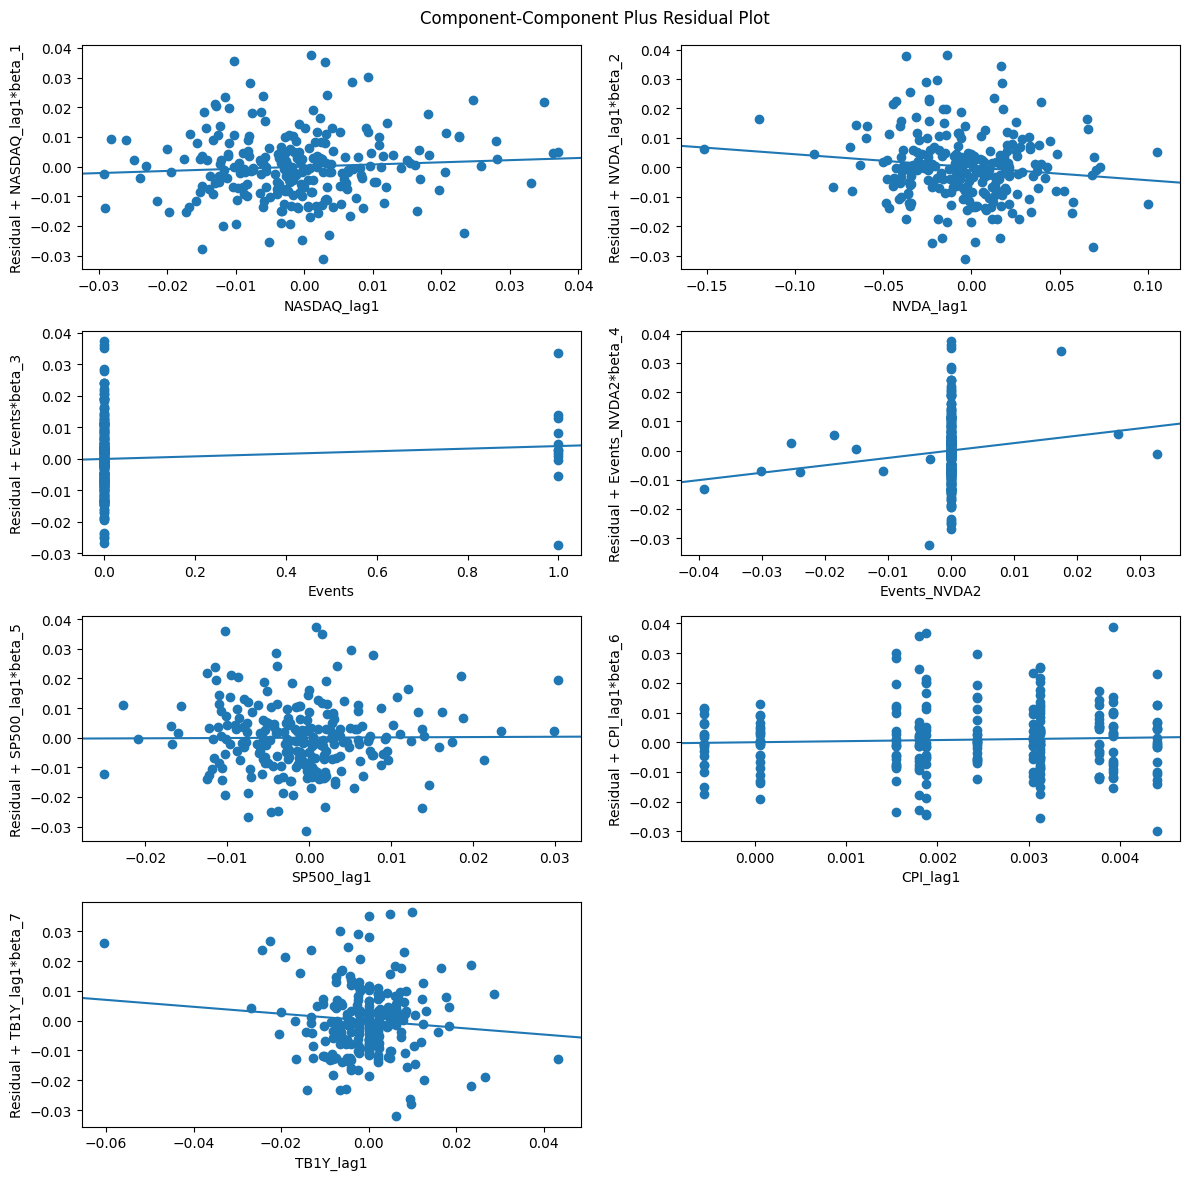

In [42]:
fig = plt.figure(figsize=(12, 12))

sm.graphics.plot_ccpr_grid(model5, fig=fig)
plt.show()